In [2]:
import numpy as np
import Ipynb_importer
from model import *
import h5py
import matplotlib.pyplot as plt

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Train accuracy: 99.04306220095694 %
Test accuracy: 70.0 %


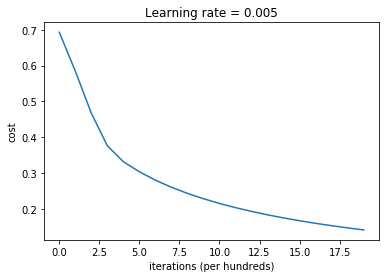

'\n\nlearning_rate = [0.01, 0.001, 0.0001]\n\nmodels = {}\n\nfor i in learning_rate:\n\n    print("Learning rate is: " + str(i))\n\n    models[str(i)] = model(train_x, train_y, test_x, test_y, num_iterations = 1500, learning_rate = i, print_cost = False)\n\n    print(\'\n\' + "-------------------------------------------" + \'\n\')\n\nfor i in learning_rate:\n    plt.plot(np.squeeze(models[str(i)]["costs"]), label = str(models[str(i)]["learning_rate"]))\nplt.xlabel(\'cost\')\nplt.xlabel(\'iterations (per hundreds)\')\nplt.ylabel(\'cost\')\nplt.show()\n'

In [3]:
# Loading original data

train_dataset = h5py.File('train_catvnoncat.h5', "r")
train_x_orig = np.array(train_dataset["train_set_x"][:])
train_y_orig = np.array(train_dataset["train_set_y"][:])

test_dataset = h5py.File('test_catvnoncat.h5', "r")
test_x_orig = np.array(test_dataset["test_set_x"][:])
test_y_orig = np.array(test_dataset["test_set_y"][:])

classes = np.array(test_dataset["list_classes"][:])

train_y = train_y_orig.reshape((1, train_y_orig.shape[0]))
test_y = test_y_orig.reshape((1, test_y_orig.shape[0]))

# Example of a picture

"""

index = 25

plt.imshow(train_x_orig[index])

print ("y = " + str(train_y[:, index]) + ", it's a '" + classes[np.squeeze(train_y[:, index])].decode("utf-8") +  "' picture.")

plt.show()

"""

# Reshape data

m_train = train_y.shape[1]
m_test = test_y.shape[1]
num_px = train_x_orig.shape[1]

# Train and test data

"""

print ("Number of training examples: m_train = " + str(m_train))

print ("Number of testing examples: m_test = " + str(m_test))

print ("Height/Width of each image: num_px = " + str(num_px))

print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

print ("train_x_orig shape: " + str(train_x_orig.shape))

print ("train_y shape: " + str(train_y.shape))

print ("test_x_orig shape: " + str(test_x_orig.shape))

print ("test_y shape: " + str(test_y.shape))

"""

# Reshape the training and test data

train_x = train_x_orig.reshape(m_train, num_px * num_px * 3).T / 255
test_x = test_x_orig.reshape(m_test, num_px * num_px * 3).T / 255

"""

print ("train_x shape: " + str(train_x.shape))

print ("train_y shape: " + str(train_y.shape))

print ("test_x shape: " + str(test_x.shape))

print ("test_y shape: " + str(test_y.shape))

"""

# Logistic regression model

d = model(train_x, train_y, test_x, test_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

# Plot learning curve

costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.xlabel('iterations (per hundreds)')
plt.ylabel('cost')
plt.title('Learning rate = '+ str(d["learning_rate"]))
plt.show()

# Choice of learning rate

"""

learning_rate = [0.01, 0.001, 0.0001]

models = {}

for i in learning_rate:

    print("Learning rate is: " + str(i))

    models[str(i)] = model(train_x, train_y, test_x, test_y, num_iterations = 1500, learning_rate = i, print_cost = False)

    print('\n' + "-------------------------------------------" + '\n')

for i in learning_rate:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label = str(models[str(i)]["learning_rate"]))
plt.xlabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.ylabel('cost')
plt.show()
"""